## EDA

### general inspection

In [ ]:
cohort_mental_3_todo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13400 entries, 0 to 13399
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SUBJECT_ID           13400 non-null  Int64         
 1   HADM_ID              13400 non-null  Int64         
 2   ADMITTIME            13400 non-null  datetime64[us]
 3   DISCHTIME            13400 non-null  datetime64[us]
 4   DOD                  5087 non-null   datetime64[us]
 5   GENDER               13400 non-null  object        
 6   MARITAL_STATUS       12505 non-null  object        
 7   INSURANCE            13400 non-null  object        
 8   ADMISSION_TYPE       13400 non-null  object        
 9   RELIGION             13301 non-null  object        
 10  ETHNICITY            13400 non-null  object        
 11  LANGUAGE             9910 non-null   object        
 12  mortality_30d        13400 non-null  Int64         
 13  gsn_list             13400 non-

In [ ]:
# Look at a few rows
cohort_mental_3_todo.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DOD,GENDER,MARITAL_STATUS,INSURANCE,ADMISSION_TYPE,RELIGION,ETHNICITY,LANGUAGE,mortality_30d,gsn_list,procedure_icd9_list
0,62974,176174,2140-04-17 22:06:00,2140-04-22 15:40:00,NaT,F,None,Private,EMERGENCY,CATHOLIC,UNKNOWN/NOT SPECIFIED,ENGL,0,"[001255, 001210, 048287, 063951, 003009, 00445...",[9671]
1,1159,124550,2147-09-25 16:07:00,2147-09-29 18:59:00,2149-11-20,M,None,Private,EMERGENCY,CATHOLIC,WHITE,None,0,"[001255, 001210, 045308, 001248, 001262, 00422...",[]
2,65560,169834,2135-06-12 11:29:00,2135-06-18 15:48:00,NaT,F,None,Medicare,ELECTIVE,UNOBTAINABLE,UNABLE TO OBTAIN,ENGL,0,"[001210, 016546, 050714, 001989, 062823, 00506...","[3521, 3956, 3961, 3897]"
3,13647,143439,2108-12-17 01:53:00,2108-12-23 13:00:00,NaT,M,None,Private,EMERGENCY,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,None,0,"[001210, 004103, 001255, 003753, 009061, 00958...","[4579, 4594, 5122, 9671, 3893, 9915]"
4,47949,130852,2199-09-21 05:02:00,2199-09-21 12:00:00,NaT,M,None,Self Pay,EMERGENCY,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,ENGL,0,"[021732, 003009, 002922, 000390, 019964, 00452...",[8659]


In [ ]:
df = cohort_mental_3_todo

In [ ]:
df['mortality_30d'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

### general ploting fuction

In [ ]:
def bar_percentages(df, group_col, plot_title):
    """
    Creates a stacked percentage bar plot by group_col showing mortality_30d = 0 and 1,
    with percentage values labeled inside each segment.
    """
    # Group and calculate counts
    grouped = df.groupby([group_col, 'mortality_30d']).size().unstack(fill_value=0)

    # Total per group (row)
    totals = grouped.sum(axis=1)

    # Calculate percentage
    percentages = grouped.div(totals, axis=0) * 100
    # Sort by mortality = 1 percentage descending

    #this line orders the death percentages for a better visual (el grafico es mas lindo)
    percentages = percentages.sort_values(by=1, ascending=False)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    bars_0 = ax.bar(percentages.index, percentages[0], label='Alive (0)', color='skyblue')
    bars_1 = ax.bar(percentages.index, percentages[1], bottom=percentages[0], label='Dead (1)', color='salmon')

    # Annotate with % inside bars
    for i, (bar0, bar1) in enumerate(zip(bars_0, bars_1)):
        h0 = bar0.get_height()
        if h0 > 3:
            ax.text(bar0.get_x() + bar0.get_width()/2, h0/2,
                    f'{h0:.1f}%', ha='center', va='center', color='black')

        h1 = bar1.get_height()
        base1 = percentages[0].iloc[i]
        if h1 > 3:
            ax.text(bar1.get_x() + bar1.get_width()/2, base1 + h1/2,
                    f'{h1:.1f}%', ha='center', va='center', color='black')

    # Aesthetics
    ax.set_ylabel('Percentage')
    ax.set_title(plot_title)
    ax.legend(title='mortality_30d')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Gender

In [ ]:
df['GENDER'].unique()

array(['F', 'M'], dtype=object)

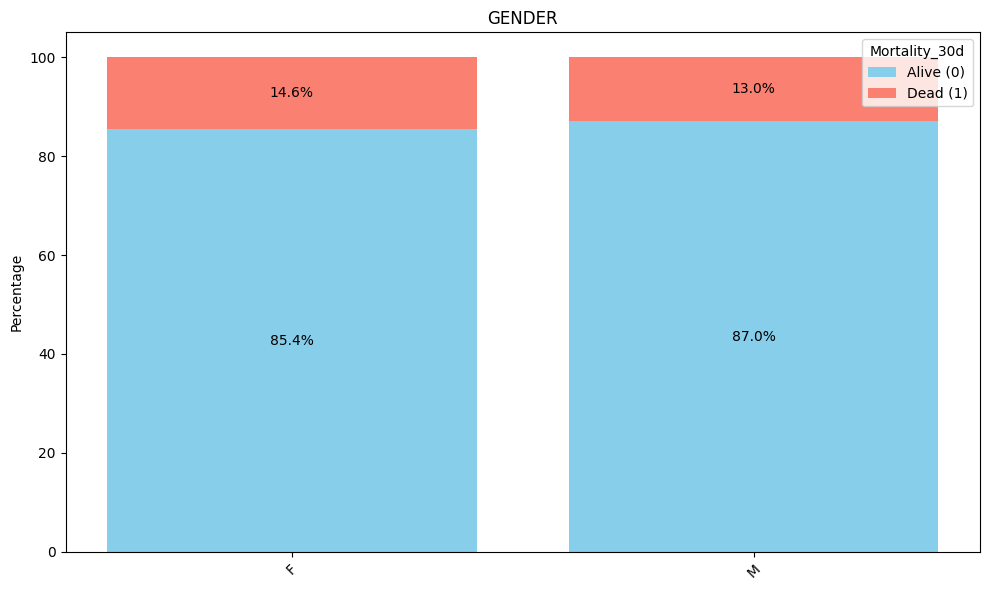

In [ ]:
# Group by MARITAL_STATUS and mortality_30d
mortality_by_marital_status = df.groupby(['GENDER', 'mortality_30d']).size().unstack(fill_value=0)

# Calculate total per marital status
total_by_marital_status = mortality_by_marital_status.sum(axis=1)

# Calculate percentages
mortality_percentages = mortality_by_marital_status.div(total_by_marital_status, axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot base (mortality = 0)
bars_0 = ax.bar(mortality_percentages.index, mortality_percentages[0], label='Alive (0)', color='skyblue')

# Plot stacked (mortality = 1) on top of 0
bars_1 = ax.bar(mortality_percentages.index, mortality_percentages[1], bottom=mortality_percentages[0], label='Dead (1)', color='salmon')

# Add % text inside each part of the bar
for i, (bar0, bar1) in enumerate(zip(bars_0, bars_1)):
    # Text inside bar0 (bottom part)
    height_0 = bar0.get_height()
    if height_0 > 3:  # Avoid overlapping on small bars
        ax.text(bar0.get_x() + bar0.get_width() / 2, height_0 / 2,
                f'{height_0:.1f}%', ha='center', va='center', color='black')

    # Text inside bar1 (top part)
    height_1 = bar1.get_height()
    base_1 = mortality_percentages[0].iloc[i]
    if height_1 > 3:
        ax.text(bar1.get_x() + bar1.get_width() / 2, base_1 + height_1 / 2,
                f'{height_1:.1f}%', ha='center', va='center', color='black')

# Aesthetics
ax.set_ylabel('Percentage')
ax.set_title('GENDER')
ax.legend(title='Mortality_30d')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### marital status


In [ ]:
df['MARITAL_STATUS'].unique()

array([None, 'SINGLE', 'MARRIED', 'WIDOWED', 'DIVORCED', 'SEPARATED',
       'LIFE PARTNER', 'UNKNOWN (DEFAULT)'], dtype=object)

filling NA with 'UNKNOWN (DEFAULT)'

In [ ]:
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)')

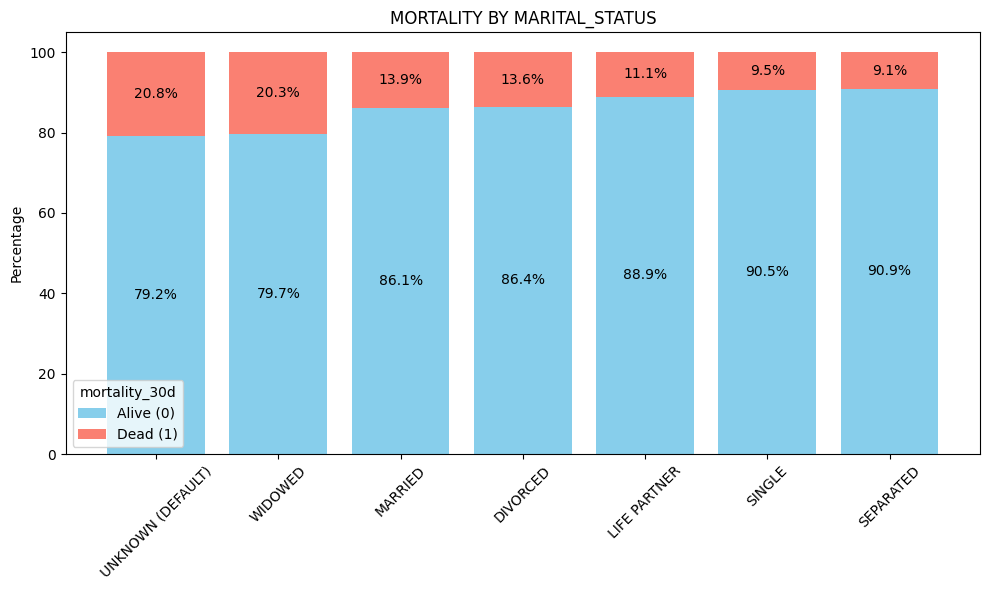

In [ ]:
bar_percentages(df, 'MARITAL_STATUS', 'MORTALITY BY MARITAL_STATUS')

### Insurance

In [ ]:
df['INSURANCE'].unique()

array(['Private', 'Medicare', 'Self Pay', 'Medicaid', 'Government'],
      dtype=object)

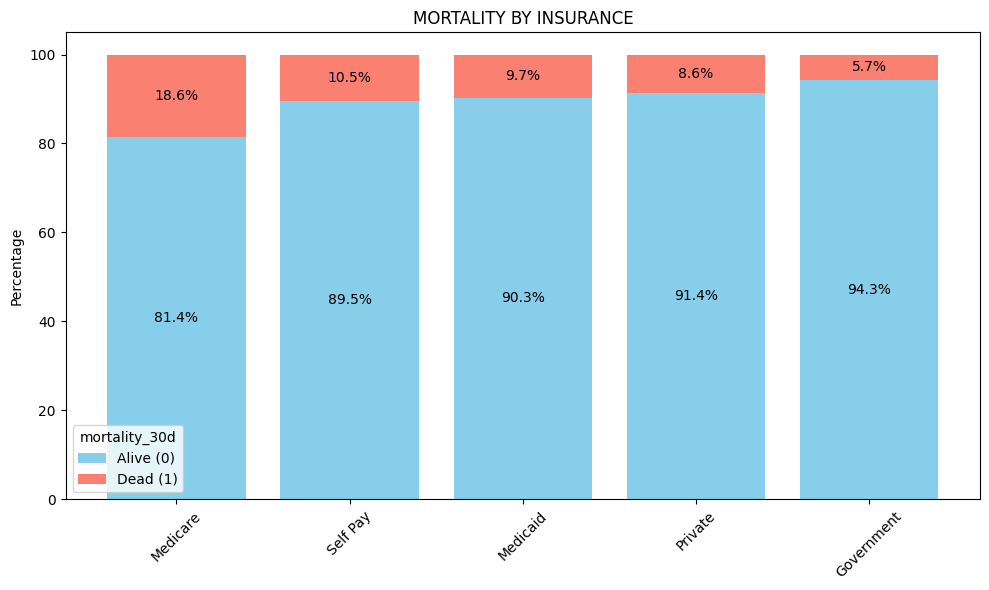

In [ ]:
bar_percentages(df, 'INSURANCE', 'MORTALITY BY INSURANCE')

### admisssion type

In [ ]:
df['ADMISSION_TYPE'].unique()

array(['EMERGENCY', 'ELECTIVE', 'URGENT', 'NEWBORN'], dtype=object)

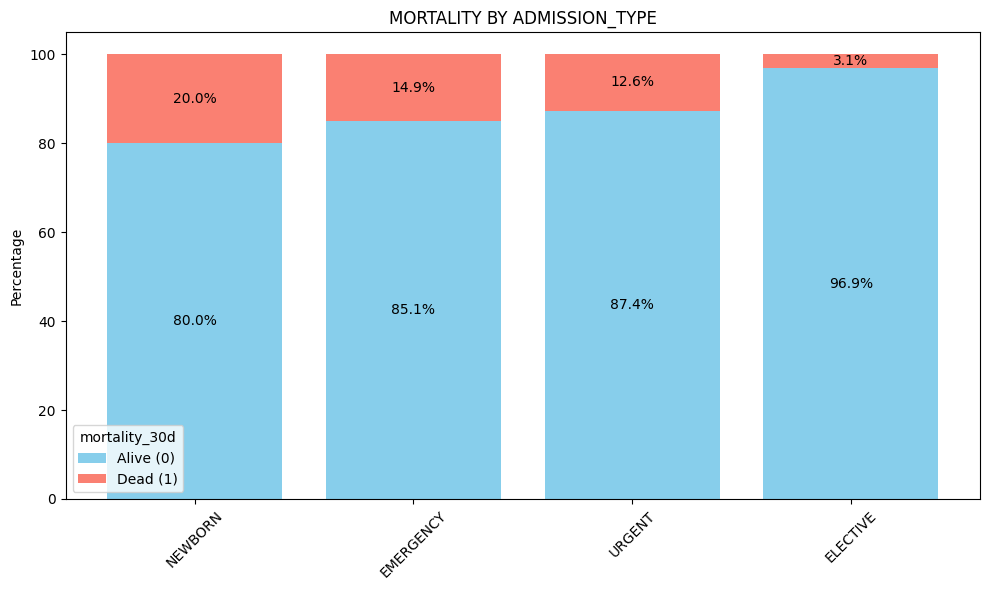

In [ ]:
bar_percentages(df, 'ADMISSION_TYPE', 'MORTALITY BY ADMISSION_TYPE')

In [ ]:
total_newborn = (df['ADMISSION_TYPE'] == 'NEWBORN').sum()
print(f"Total number of admissions with ADMISSION_TYPE 'NEWBORN': {total_newborn}")

Total number of admissions with ADMISSION_TYPE 'NEWBORN': 5


### RELIGION

In [ ]:
df['RELIGION'].unique()

array(['CATHOLIC', 'UNOBTAINABLE', 'NOT SPECIFIED', 'OTHER', 'JEWISH',
       'EPISCOPALIAN', 'PROTESTANT QUAKER', 'GREEK ORTHODOX',
       "JEHOVAH'S WITNESS", 'CHRISTIAN SCIENTIST', 'BUDDHIST', None,
       '7TH DAY ADVENTIST', 'MUSLIM', 'UNITARIAN-UNIVERSALIST',
       'ROMANIAN EAST. ORTH', 'HEBREW', 'BAPTIST', 'HINDU', 'METHODIST'],
      dtype=object)

With the forgiveness of atheists and agnostics, I will transform the categories  'NOT SPECIFIED' and None into  'UNOBTAINABLE'

In [ ]:
df['RELIGION'] = df['RELIGION'].replace(['NOT SPECIFIED',  None], 'UNOBTAINABLE')

In [ ]:
df['RELIGION'] = df['RELIGION'].replace(['HEBREW'], 'JEWISH')

In [ ]:
df['RELIGION'].unique()

array(['CATHOLIC', 'UNOBTAINABLE', 'OTHER', 'JEWISH', 'EPISCOPALIAN',
       'PROTESTANT QUAKER', 'GREEK ORTHODOX', "JEHOVAH'S WITNESS",
       'CHRISTIAN SCIENTIST', 'BUDDHIST', '7TH DAY ADVENTIST', 'MUSLIM',
       'UNITARIAN-UNIVERSALIST', 'ROMANIAN EAST. ORTH', 'BAPTIST',
       'HINDU', 'METHODIST'], dtype=object)

In [ ]:
df['RELIGION'].value_counts()

,count
RELIGION,
UNOBTAINABLE,5027
CATHOLIC,4670
PROTESTANT QUAKER,1484
JEWISH,1117
OTHER,587
EPISCOPALIAN,165
CHRISTIAN SCIENTIST,94
GREEK ORTHODOX,89
BUDDHIST,37


All the religions < than 'other' will be included in this category.  

In [ ]:
df['RELIGION'] = df['RELIGION'].replace(['EPISCOPALIAN', 'CHRISTIAN SCIENTIST', 'GREEK ORTHODOX', 'BUDDHIST', 'MUSLIM', 'UNITARIAN-UNIVERSALIST', "JEHOVAH'S WITNESS", "7TH DAY ADVENTIST", "ROMANIAN EAST. ORTH", "HINDU", "BAPTIST", "METHODIST"], 'OTHER')

In [ ]:
df['RELIGION'].value_counts()

,count
RELIGION,
UNOBTAINABLE,5027
CATHOLIC,4670
PROTESTANT QUAKER,1484
JEWISH,1117
OTHER,1102


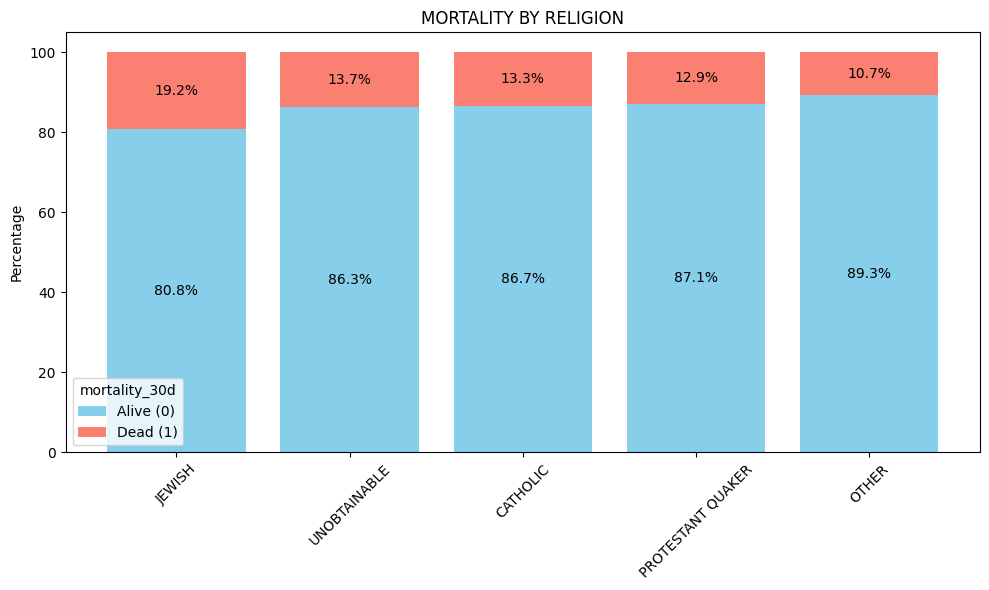

In [ ]:
bar_percentages(df, 'RELIGION', 'MORTALITY BY RELIGION')

### Ethnicity

In [ ]:
df['ETHNICITY'].unique()

array(['UNKNOWN/NOT SPECIFIED', 'WHITE', 'UNABLE TO OBTAIN',
       'HISPANIC OR LATINO', 'OTHER', 'HISPANIC/LATINO - DOMINICAN',
       'BLACK/AFRICAN AMERICAN', 'MULTI RACE ETHNICITY',
       'PATIENT DECLINED TO ANSWER', 'HISPANIC/LATINO - PUERTO RICAN',
       'ASIAN', 'HISPANIC/LATINO - SALVADORAN', 'ASIAN - CHINESE',
       'ASIAN - VIETNAMESE', 'BLACK/HAITIAN', 'PORTUGUESE',
       'WHITE - OTHER EUROPEAN', 'WHITE - RUSSIAN',
       'HISPANIC/LATINO - GUATEMALAN', 'ASIAN - OTHER',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'HISPANIC/LATINO - MEXICAN',
       'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'ASIAN - ASIAN INDIAN', 'WHITE - EASTERN EUROPEAN',
       'MIDDLE EASTERN', 'SOUTH AMERICAN', 'HISPANIC/LATINO - CUBAN',
       'ASIAN - CAMBODIAN', 'BLACK/CAPE VERDEAN', 'WHITE - BRAZILIAN',
       'AMERICAN INDIAN/ALASKA NATIVE',
       'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
       'ASIAN - FILIPINO', 'ASIAN - KOREAN', 'BLACK/AFRICAN

In [ ]:
df['ETHNICITY'].value_counts()

,count
ETHNICITY,
WHITE,9747
BLACK/AFRICAN AMERICAN,1073
UNKNOWN/NOT SPECIFIED,948
HISPANIC OR LATINO,396
UNABLE TO OBTAIN,303
OTHER,300
ASIAN,117
PATIENT DECLINED TO ANSWER,115
HISPANIC/LATINO - PUERTO RICAN,69


In [ ]:
df['ETHNICITY'] = df['ETHNICITY'].str.replace(r'^ASIAN.*', 'ASIAN', regex=True)

In [ ]:
df['ETHNICITY'] = df['ETHNICITY'].str.replace(r'^HISPANIC.*', 'HISPANIC OR LATINO', regex=True)

In [ ]:
df['ETHNICITY'] = df['ETHNICITY'].str.replace(r'^WHITE.*', 'WHITE', regex=True)

In [ ]:
df['ETHNICITY'] = df['ETHNICITY'].str.replace(r'^BLACK.*', 'BLACK/AFRICAN AMERICAN', regex=True)

In [ ]:
df['ETHNICITY']  = df['ETHNICITY'].replace(['MULTI RACE ETHNICITY', 'PORTUGUESE', 'AMERICAN INDIAN/ALASKA NATIVE', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'MIDDLE EASTERN', 'SOUTH AMERICAN', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'CARIBBEAN ISLAND']
, 'OTHER')

In [ ]:
df['ETHNICITY'].value_counts()

,count
ETHNICITY,
WHITE,9818
BLACK/AFRICAN AMERICAN,1142
UNKNOWN/NOT SPECIFIED,948
HISPANIC OR LATINO,524
OTHER,365
UNABLE TO OBTAIN,303
ASIAN,185
PATIENT DECLINED TO ANSWER,115


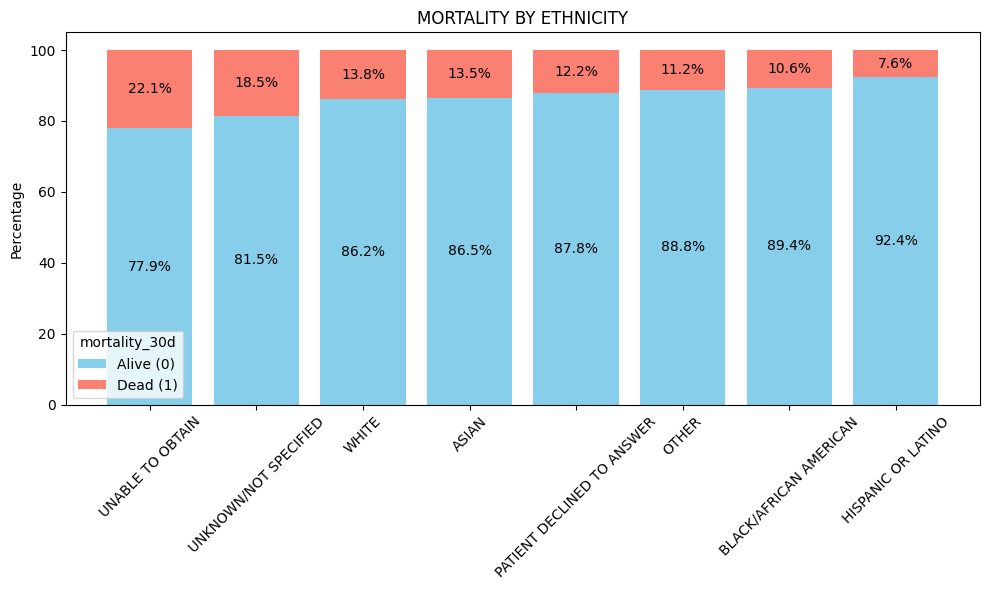

In [ ]:
bar_percentages(df, 'ETHNICITY', 'MORTALITY BY ETHNICITY')

### Language

In [ ]:
df['LANGUAGE'].unique()

array(['ENGL', None, 'SPAN', 'RUSS', 'CAPE', 'PORT', 'VIET', 'PTUN',
       'MAND', 'ITAL', 'CANT', 'HAIT', 'GREE', 'PERS', 'LAOT', '*FAR',
       'CAMB', 'ARAB', '*BUL', 'HIND', '*HUN', '*ARM', 'POLI', 'ETHI',
       '*SPA', 'ALBA', 'TAGA', 'JAPA', 'THAI', 'KORE', '*URD', 'FREN',
       '*ROM', 'AMER', '*BUR', '*CDI', '*AMH', '*BEN', 'SOMA', '*GUJ',
       'SERB', '*CRE', '*YID', '*IBO', 'TURK', '*PER', '*CHI', 'BENG',
       '**TO'], dtype=object)

In [ ]:
df['LANGUAGE'].value_counts()

,count
LANGUAGE,
ENGL,8896
SPAN,289
PTUN,203
RUSS,168
PORT,71
CANT,59
CAPE,49
HAIT,25
ITAL,23


again, losing variety I am putting all the languages < ITALIAN into "other"

In [ ]:
df['LANGUAGE']  = df['LANGUAGE'].replace(['MAND', 'VIET', 'GREE', 'CAMB', 'PERS', 'AMER', 'ARAB', 'POLI', 'HIND', 'ALBA', 'KORE', 'FREN', 'LAOT', '*YID', 'JAPA', '*FAR', 'ETHI', '*SPA', '*HUN', 'THAI', 'TAGA', '*ARM', '*BUL', '*ROM', '*URD', '*CDI', '*BUR', '*BEN', 'SOMA', '*GUJ', '*AMH', 'SERB', '*CRE', '*IBO', 'TURK', '*PER', '*CHI', 'BENG', '**TO']
, 'OTHER')

In [ ]:
df['LANGUAGE'].value_counts()

,count
LANGUAGE,
ENGL,8896
SPAN,289
PTUN,203
RUSS,168
OTHER,127
PORT,71
CANT,59
CAPE,49
HAIT,25


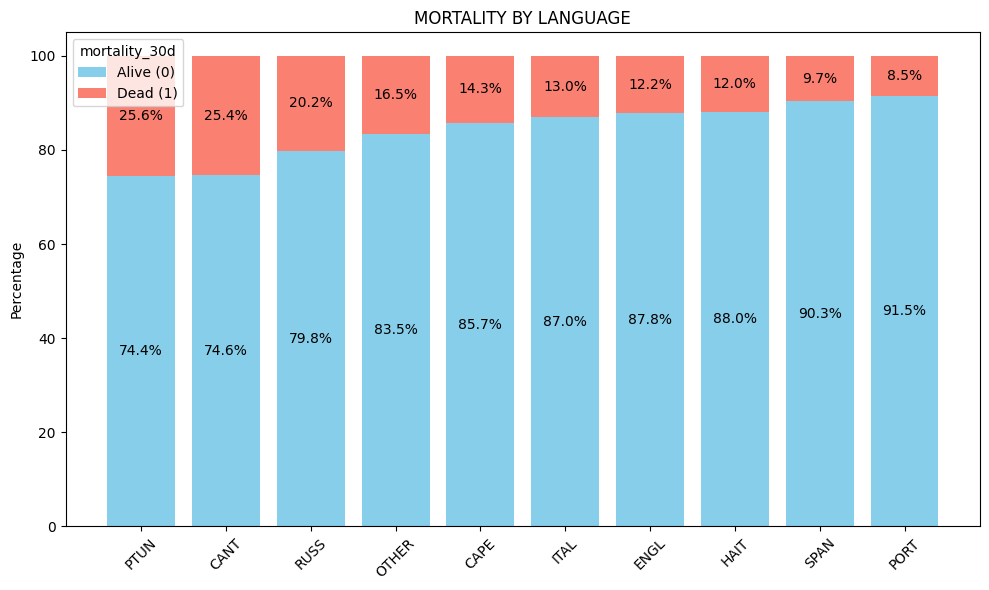

In [ ]:
bar_percentages(df, 'LANGUAGE', 'MORTALITY BY LANGUAGE')

download cvs

In [ ]:
# prompt: how to download df into cvs?

df.to_csv('cohort_mental_3_limpia.csv', index=False)

In [ ]:
# prompt: how todownload df to my computer?

from google.colab import files
files.download('cohort_mental_3_limpia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>